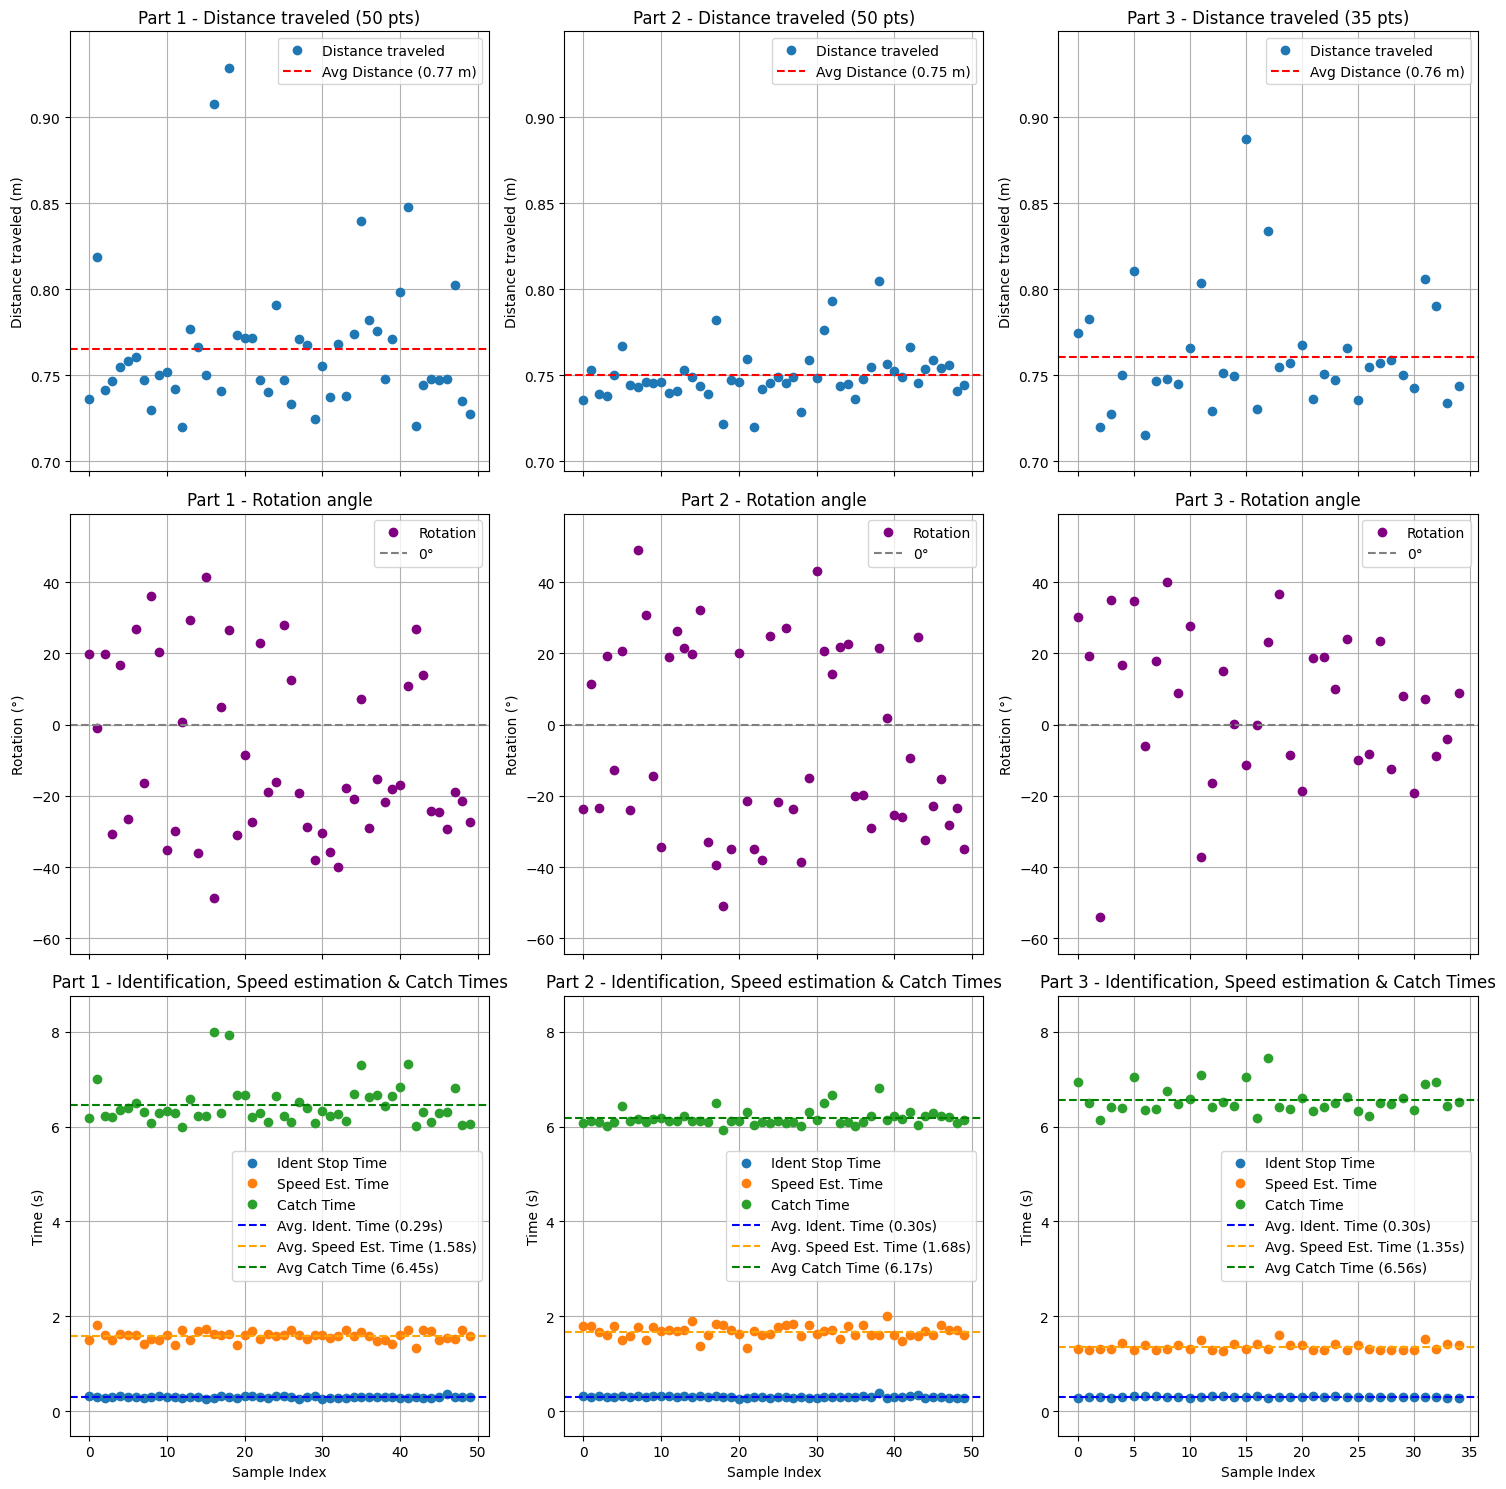

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def add_margin(ymin, ymax, margin=0.1):
    y_range = ymax - ymin
    if y_range == 0:
        margin_abs = 1 if ymin == 0 else abs(ymin) * margin
        return ymin - margin_abs, ymax + margin_abs
    margin_abs = y_range * margin
    return ymin - margin_abs, ymax + margin_abs

# Load CSV
df = pd.read_csv("plots_for_thesis/25Hz_times.csv")

parts = [0, 1, 2]
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex='col')

# Calculate y-limits for each row first

# Distances
distance_min = np.inf
distance_max = -np.inf
for part_id in parts:
    part_df = df[df["part_number"] == part_id]
    if not part_df.empty:
        distance_min = min(distance_min, part_df["distance_traveled"].min())
        distance_max = max(distance_max, part_df["distance_traveled"].max())
distance_min, distance_max = add_margin(distance_min, distance_max, 0.1)

# Rotations
rotation_min = np.inf
rotation_max = -np.inf
for part_id in parts:
    part_df = df[df["part_number"] == part_id]
    if not part_df.empty and "part_rotation" in part_df.columns:
        rotation_min = min(rotation_min, part_df["part_rotation"].min())
        rotation_max = max(rotation_max, part_df["part_rotation"].max())
rotation_min = min(rotation_min, 0)
rotation_max = max(rotation_max, 0)
rotation_min, rotation_max = add_margin(rotation_min, rotation_max, 0.1)

# Times
time_min = np.inf
time_max = -np.inf
for part_id in parts:
    part_df = df[df["part_number"] == part_id]
    if not part_df.empty:
        ident_stop = part_df["time_ident_stop"]
        est_time = part_df["time_speed_est_stop"] - part_df["time_speed_est_start"]
        catch_time = part_df["time_catch_stop"] - part_df["time_catch_start"]
        time_min = min(time_min, ident_stop.min(), est_time.min(), catch_time.min())
        time_max = max(time_max, ident_stop.max(), est_time.max(), catch_time.max())
time_min, time_max = add_margin(time_min, time_max, 0.1)

# Plotting
for col, part_id in enumerate(parts):
    part_df = df[df["part_number"] == part_id].reset_index(drop=True)
    n_points = len(part_df)
    avg_distance = part_df["distance_traveled"].mean()

    # Distance (show n_points here)
    axes[0, col].plot(part_df.index, part_df["distance_traveled"], marker='o', linestyle="", label="Distance traveled")
    axes[0, col].axhline(avg_distance, color='r', linestyle='--', label=f"Avg Distance ({avg_distance:.2f} m)")
    axes[0, col].set_title(f"Part {part_id + 1} - Distance traveled ({n_points} pts)")
    axes[0, col].set_ylabel("Distance traveled (m)")
    axes[0, col].grid(True)
    axes[0, col].set_ylim(distance_min, distance_max)
    axes[0, col].legend()

    # Rotation (no n_points)
    if "part_rotation" in part_df.columns:
        axes[1, col].plot(part_df.index, part_df["part_rotation"], marker='o', color="purple", linestyle="", label="Rotation")
        axes[1, col].axhline(0, color='gray', linestyle='--', label="0°")
        axes[1, col].set_title(f"Part {part_id + 1} - Rotation angle")
        axes[1, col].set_ylabel("Rotation (°)")
        axes[1, col].grid(True)
        axes[1, col].set_ylim(rotation_min, rotation_max)
        axes[1, col].legend()
    else:
        axes[1, col].set_visible(False)

    # Times (no n_points)
    ident_stop = part_df["time_ident_stop"]
    est_time = part_df["time_speed_est_stop"] - part_df["time_speed_est_start"]
    catch_time = part_df["time_catch_stop"] - part_df["time_catch_start"]

    axes[2, col].plot(part_df.index, ident_stop, marker='o', label="Ident Stop Time", linestyle="")
    axes[2, col].plot(part_df.index, est_time, marker='o', label="Speed Est. Time", linestyle="")
    axes[2, col].plot(part_df.index, catch_time, marker='o', label="Catch Time", linestyle="")

    avg_ident_stop = ident_stop.mean()
    avg_est_time = est_time.mean()
    avg_catch_time = catch_time.mean()

    axes[2, col].axhline(avg_ident_stop, color='blue', linestyle='--', label=f"Avg. Ident. Time ({avg_ident_stop:.2f}s)")
    axes[2, col].axhline(avg_est_time, color='orange', linestyle='--', label=f"Avg. Speed Est. Time ({avg_est_time:.2f}s)")
    axes[2, col].axhline(avg_catch_time, color='green', linestyle='--', label=f"Avg Catch Time ({avg_catch_time:.2f}s)")

    axes[2, col].set_title(f"Part {part_id + 1} - Time breakdown")
    axes[2, col].set_xlabel("Sample Index")
    axes[2, col].set_ylabel("Time (s)")
    axes[2, col].grid(True)
    axes[2, col].set_ylim(time_min, time_max)
    axes[2, col].legend()

plt.tight_layout()
plt.show()


In [22]:
fig.savefig("time_plots.pdf", bbox_inches='tight')